In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('true_car_listings.csv')
data

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [9]:
x = data[['Price', 'Year', 'Mileage']]
y = data['Make']  # Extracting as a Series instead of DataFrame

# Convert y to a 1D array using ravel()
y = y.values.ravel()

model = KNeighborsClassifier()

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=50)

model.fit(x_train, y_train)


/home/vetri/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [11]:
# User input
price = int(input("Enter the price: "))
year = int(input("Enter the year of the car: "))
mileage = int(input("Enter the mileage of the car: "))

prediction = model.predict([[price, year, mileage]])
print(f"Predicted make: {prediction[0]}")


Enter the price: 100000
Enter the year of the car: 300
Enter the mileage of the car: 30000
Predicted make: Honda


/home/vetri/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


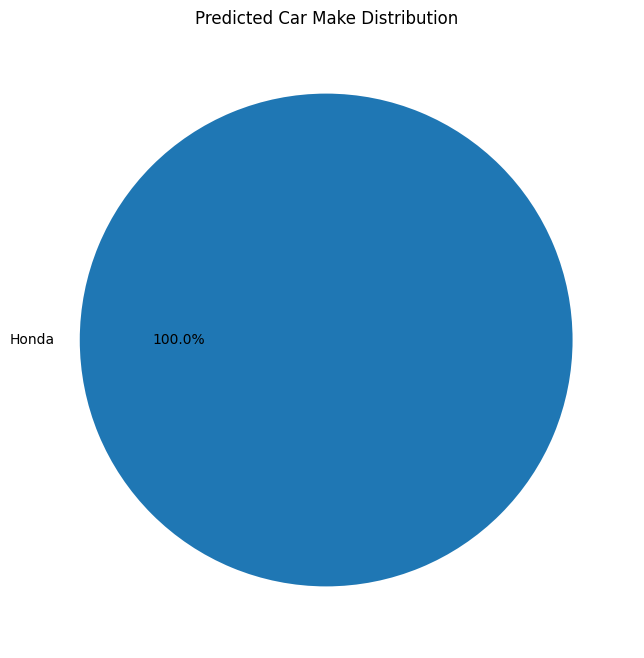

In [14]:
predicted_makes, counts = np.unique(prediction, return_counts=True)
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=predicted_makes, autopct='%1.1f%%')
plt.title('Predicted Car Make Distribution')
plt.show()